In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [5]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return"Negative"

In [6]:
df["Rating"]=df['Rating'].apply(ratings)

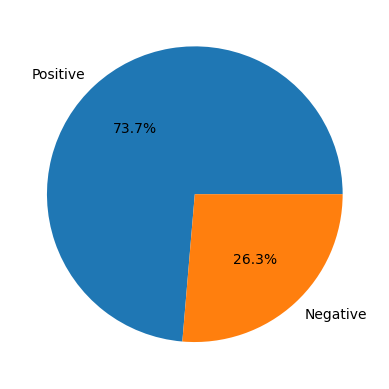

In [7]:
plt.pie(df['Rating'].value_counts(),
        labels=df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()


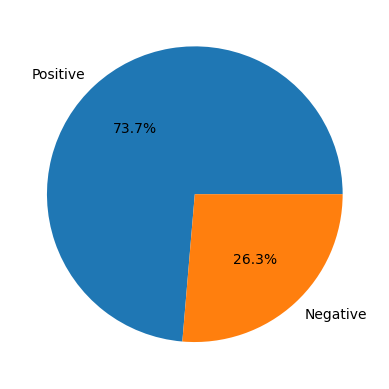

In [8]:
plt.pie(df['Rating'].value_counts(), 

        labels=df['Rating'].unique().tolist(), 

        autopct='%1.1f%%')

plt.show()

In [9]:
length=len(df['Review'][0])
print(f'Length of a sample review:{length}')

Length of a sample review:593


In [10]:
df['Length']=df['Review'].str.len()

df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [11]:
word_count=df['Review'][0].split()
print(f'Word count in a sample review:{len(word_count)}')

Word count in a sample review:87


In [12]:
def word_count(review):
    review_list=review.split()
    return len(review_list)

In [13]:
df['Word_count'] = df['Review'].apply(word_count)

df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [14]:
df['mean_word_length']=df['Review'].map(lambda rev:np.mean([len(word)
                                                          for word in rev.split()]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [15]:
import re
from nltk.corpus import stopwords
def clean(review):
    review=review.lower()
    review=re.sub('[^a-z A-Z 0-9-]+','',review)
    review=" ".join([word for word in review.split() if word not in stopwords.words('english')])
    return review

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Guna
[nltk_data]     Harshitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [18]:
def corpus(text):
    text_list=text.split()
    return text_list

In [19]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head()

,Review,Rating,Length,Word_count,mean_word_length,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571,"[great, stay, great, stay,, went, seahawk, gam..."


In [20]:
from tqdm import trange
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, 
                colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 56653.52it/s]


2138765

In [21]:
from collections import Counter
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [22]:
words=[]
freq=[]
for word,count in mostCommon:
    words.append(word)
    freq.append(count)

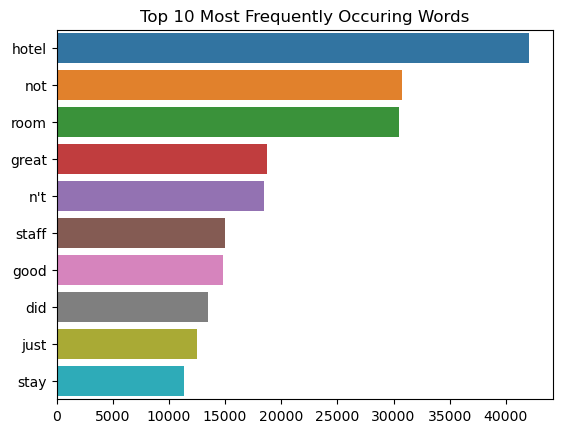

In [23]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df['Review'])


In [ ]:
count_values = bigrams.sum(axis=0)
ngram_freq = pd.DataFrame(
    sorted([(count_values[0, i], k) for k, i in cv.vocabulary_.items()], reverse=True)
)
ngram_freq.columns = ["frequency", "ngram"]


In [ ]:
import seaborn as sns
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()